In [233]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


from math import isnan
from matplotlib.animation import FuncAnimation
import scipy.ndimage as ndimage

from matplotlib import animation, rc

In [172]:
#Importing the crime data

#Data source below
#https://data.cityofchicago.org/Public-Safety/Crime_2014_2018/tunj-hqmk

crime=pd.read_csv('Crime_2014_2018.csv')
crime.head()
len(crime.index)
#length
#Length should be 1345713

1345713

In [173]:
#remove the records with zero as the community area
crime=crime.loc[crime['Community Area']!=0]
crime.head()
len(crime.index)

1345706

In [174]:
#creating new columns for Year, Month, and Day
crime['Year'] = pd.DatetimeIndex(crime['Date']).year
crime['Month'] = pd.DatetimeIndex(crime['Date']).month
crime['Day'] = pd.DatetimeIndex(crime['Date']).day
crime.head(2)
# len(crime)
#the total number of records is 1345713
crime['Date'].min()
crime['Date'].max()

'12/31/2018 12:55:00 AM'

In [176]:
#filtering data for everything greater than 2013 and less than 2019
crime=crime.loc[(crime['Year']>2013) & (crime['Year']<2019)]
len(crime)
#after filtering the total number of records is 1345162

1345155

In [237]:
#merge the crime data with the community areas data
crime_comm = pd.merge(crime, comm, left_on="Community Area", right_on='AREA_NUMBE', how="left")
crime_comm.head()
len(crime_comm) #length is 1345162

1345155

In [238]:
#total number of records by Community Area
c_bycomm=crime_comm.groupby(['COMMUNITY'])['ID'].count()

#total number of records by Year
c_byyear=crime_comm.groupby(['Year'])['ID'].count()

#total number of records by year by Month
c_byyear_bymonth=crime_comm.groupby(['Year','Month'])['ID'].count()

#total number of crimes by crime type
c_bytype=crime_comm.groupby(['Primary Type'])['ID'].count()

#total number of crime reports by community area by year by month
c_bycomm_byyear=crime_comm.groupby(['COMMUNITY','Year'])['ID'].count()

#total number of crime reports by community area by year by month
c_bycomm_byyear_bymonth=crime_comm.groupby(['COMMUNITY','Year','Month'])['ID'].count()


In [179]:
#Importing the community areas data

#Data source below
#https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

comm=pd.read_csv('CommAreas_20200108.csv')
comm.head()
length=len(comm.index)
length


77

In [304]:
#Importing the populationa by community area data

#Data source below
#https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

pop=pd.read_csv('Pop-Census-Data-by-Chicago-Community-Area-2017.csv')
pop.head()
length=len(pop.index)
length

pop['Community'] = pop['Community'].str.upper() 

pop=pop[['Community','Community Area','Total Population']]
pop.head()

,Community,Community Area,Total Population
0,ROGERS PARK,1,"53,470"
1,WEST RIDGE,2,"75,185"
2,UPTOWN,3,"54,001"
3,LINCOLN SQUARE,4,"46,881"
4,NORTH CENTER,5,"35,406"


In [180]:
#Importing the street light requests data

#Data source below
#https://data.cityofchicago.org/Service-Requests/ServiceRequests_2014_2018/wx4a-kywa

street=pd.read_csv('ServiceRequests_2014_2018.csv')
street.head()
length=len(street.index)
length

#add a year column
street['Year'] = pd.DatetimeIndex(street['Creation Date']).year
street['Month'] = pd.DatetimeIndex(street['Creation Date']).month
street['Day'] = pd.DatetimeIndex(street['Creation Date']).day
# street['Creation Date'] =  pd.to_datetime(street['Creation Date'], format='%d%b%Y:%H:%M:%S.%f')
# street['Creation Date'] = datetime.strptime(street['Creation Date'], '%A, %B %d, %Y')
#street['Service Lag Time'] = street["Completion Date"] - street["Creation Date"]
street=street.loc[(street['Year']>2013) & (street['Year']<2019)]

# street=pd.read_csv('project_1/Service_Requests_Street_Lights.csv',encoding='ISO-8859-1')
# street.head()
# length=len(street.index)
# length
#The length should be 73542
# street=street.rename(columns={'ÈÀCreation Date':'Creation Date'})
street.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location,Year,Month,Day
0,01/01/2014,Completed,01/06/2014,14-00002286,Street Lights - All/Out,1800 S ST LOUIS AVE,60623.0,1.153317e+06,1.891155e+06,24.0,10.0,29.0,41.857173,-87.712721,"(41.857172873929, -87.712720931217)",2014,1,1
1,01/01/2014,Completed,01/03/2014,14-00001931,Street Lights - All/Out,2800 W 25TH ST,60623.0,1.158100e+06,1.887282e+06,12.0,10.0,30.0,41.846450,-87.695272,"(41.846449889163, -87.695272394356)",2014,1,1
2,01/01/2014,Completed,01/03/2014,14-00001932,Street Lights - All/Out,2400 S FRANCISCO AVE,60623.0,1.157415e+06,1.887664e+06,12.0,10.0,30.0,41.847512,-87.697777,"(41.847512397968, -87.697776971725)",2014,1,1
3,01/01/2014,Completed,01/07/2014,14-00002375,Street Lights - All/Out,2555 W CARMEN AVE,60625.0,1.158098e+06,1.933770e+06,40.0,20.0,4.0,41.974016,-87.694009,"(41.974015869703, -87.694008589773)",2014,1,1
4,01/01/2014,Completed,01/03/2014,14-00002025,Street Lights - All/Out,8400 S SOUTH CHICAGO AVE,60617.0,1.191718e+06,1.849687e+06,8.0,4.0,45.0,41.742535,-87.573117,"(41.742534902585, -87.57311733998)",2014,1,1


In [181]:
length=len(street.index)
length
street.dtypes

Creation Date               object
Status                      object
Completion Date             object
Service Request Number      object
Type of Service Request     object
Street Address              object
ZIP Code                   float64
X Coordinate               float64
Y Coordinate               float64
Ward                       float64
Police District            float64
Community Area             float64
Latitude                   float64
Longitude                  float64
Location                    object
Year                         int64
Month                        int64
Day                          int64
dtype: object

In [182]:
street['Community Area'].unique()
street[['Community Area']].min()
street[['Community Area']].max()

#Filtering out null and zero values
street_nonull=street.dropna(subset=['Community Area'])
street_nozero=street_nonull.loc[street_nonull['Community Area']!=0]
#Filter out where Community Area is blank or zero
length=len(street_nozero.index)
length

73314

In [183]:
#Getting the min and max of the new dataset
street_nozero[['Community Area']].min()
street_nozero[['Community Area']].max()

street_nozero['Status'].unique()
#Status options 'Completed' and 'Open'

street_nozero['Service Request Number'].nunique()
#73237 records the second time I did this
#there are indeed only 73314 records so each request number is unique

groups= street_nozero.groupby(['Service Request Number'])['Creation Date'].count()
groups.sort_values(ascending=False)  


#the below is code to keep the first record of the duplicated records
# street_nozero.duplicated(keep=False)


# street_nozero['Community Area'].unique()

Service Request Number
14-00014619    2
18-01679033    2
16-04318031    2
17-00474065    2
14-00766985    2
              ..
17-01414111    1
17-01413883    1
17-01413804    1
17-01413800    1
14-00000533    1
Name: Creation Date, Length: 73237, dtype: int64

In [184]:

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = street_nozero[street_nozero.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)


Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Creation Date, Status, Completion Date, Service Request Number, Type of Service Request, Street Address, ZIP Code, X Coordinate, Y Coordinate, Ward, Police District, Community Area, Latitude, Longitude, Location, Year, Month, Day]
Index: []


In [185]:
street_nozero.head(3)
street_nozero['Year'].min()
street_nozero['Year'].max()

2018

In [186]:
#merge the street data with the community areas data
street_comm = pd.merge(street_nozero, comm, left_on="Community Area", right_on='AREA_NUMBE', how="left")
street_comm.head()
# len(street_comm) #length is 

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,...,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,01/01/2014,Completed,01/06/2014,14-00002286,Street Lights - All/Out,1800 S ST LOUIS AVE,60623.0,1.153317e+06,1.891155e+06,24.0,...,MULTIPOLYGON (((-87.72023936013656 41.86986908...,0,0,0,0,29,NORTH LAWNDALE,29,8.948742e+07,44959.459663
1,01/01/2014,Completed,01/03/2014,14-00001931,Street Lights - All/Out,2800 W 25TH ST,60623.0,1.158100e+06,1.887282e+06,12.0,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
2,01/01/2014,Completed,01/03/2014,14-00001932,Street Lights - All/Out,2400 S FRANCISCO AVE,60623.0,1.157415e+06,1.887664e+06,12.0,...,MULTIPOLYGON (((-87.68739948177965 41.83480098...,0,0,0,0,30,SOUTH LAWNDALE,30,1.279983e+08,49904.045210
3,01/01/2014,Completed,01/07/2014,14-00002375,Street Lights - All/Out,2555 W CARMEN AVE,60625.0,1.158098e+06,1.933770e+06,40.0,...,MULTIPOLYGON (((-87.6744075678037 41.976103404...,0,0,0,0,4,LINCOLN SQUARE,4,7.135233e+07,36624.603085
4,01/01/2014,Completed,01/03/2014,14-00002025,Street Lights - All/Out,8400 S SOUTH CHICAGO AVE,60617.0,1.191718e+06,1.849687e+06,8.0,...,MULTIPOLYGON (((-87.58565529834297 41.75150194...,0,0,0,0,45,AVALON PARK,45,3.485274e+07,27630.822534


In [195]:
#Total number of requests by community area
s_bycomm=street_comm.groupby(['COMMUNITY'])['Service Request Number'].count()

In [207]:
#Total number of requests by year
s_byyear=street_comm.groupby(['Year'])['Service Request Number'].count()

In [213]:
#Total number of requests by year by month
s_byyear_bymonth=street_comm.groupby(['Year','Month'])['Service Request Number'].count()

#Total number of requests by community area by year
s_bycomm_byyear=street_comm.groupby(['COMMUNITY','Year'])['Service Request Number'].count()

#Average time it takes to get the street light fixed over the 5 year period
#Average time it takes to get the street light fixed by year

In [325]:
bycomm = pd.merge(c_bycomm, s_bycomm, on="COMMUNITY", how="left")
bycomm.head(10)

bycomm_pop = pd.merge(bycomm, pop, left_on="COMMUNITY", right_on='Community', how="left")
bycomm_pop.head()
# bycomm_pop['Total Population'].astype('int64')

bycomm_pop['Total Population']=pd.to_numeric(bycomm_pop['Total Population'].astype(str).str.replace(',',''), errors='coerce')
bycomm_pop.head()

bycomm_pop['No. of Service Requests to Crime Reports']=bycomm_pop['Service Request Number']/bycomm_pop['ID']

#sorting by the ratio of Service Requests to Crime reports
bycomm_pop.sort_values(['No. of Service Requests to Crime Reports'],ascending=True)
bycomm_pop.sort_values(['No. of Service Requests to Crime Reports'],ascending=False)

,ID,Service Request Number,Community,Community Area,Total Population,No. of Service Requests to Crime Reports
24,2530,677,FOREST GLEN,12.0,18568.0,0.267589
9,4709,1242,BEVERLY,72.0,19969.0,0.263750
46,3058,718,MOUNT GREENWOOD,74.0,16878.0,0.234794
22,1339,283,EDISON PARK,9.0,10856.0,0.211352
30,3023,603,HEGEWISCH,55.0,9745.0,0.199471
...,...,...,...,...,...,...
71,29131,798,WEST GARFIELD PARK,26.0,20146.0,0.027393
47,54047,1232,NEAR NORTH SIDE,8.0,96466.0,0.022795
60,19046,407,ROGERS PARK,1.0,53470.0,0.021369
56,8912,172,NaN,NaN,NaN,0.019300


In [357]:
#sorting by Service Requests Number for all 5 years
bycomm_pop.sort_values(['Service Request Number'],ascending=True)
bycomm_pop.sort_values(['Service Request Number'],ascending=False)

,ID,Service Request Number,Community,Community Area,Total Population,No. of Service Requests to Crime Reports
5,83515,2665,AUSTIN,25.0,97604.0,0.031910
61,34823,2216,ROSELAND,49.0,41498.0,0.063636
3,12550,2134,ASHBURN,70.0,41782.0,0.170040
75,38337,2053,WEST TOWN,24.0,84660.0,0.053551
4,38417,1920,AUBURN GRESHAM,71.0,46817.0,0.049978
...,...,...,...,...,...,...
58,5791,266,PULLMAN,50.0,8359.0,0.045933
25,4420,173,FULLER PARK,37.0,3220.0,0.039140
56,8912,172,NaN,NaN,NaN,0.019300
12,1950,129,BURNSIDE,47.0,1703.0,0.066154


In [317]:
#sorting by crime reports for all 5 years
bycomm_pop.sort_values(['ID'],ascending=True)
bycomm_pop.sort_values(['ID'],ascending=False)

,ID,Service Request Number,Community,Community Area,Total Population,No. of Service Requests to Crime Reports
5,83515,2665,AUSTIN,25.0,97604.0,0.031910
47,54047,1232,NEAR NORTH SIDE,8.0,96466.0,0.022795
41,45429,797,LOOP,32.0,32936.0,0.017544
52,44450,1594,NORTH LAWNDALE,29.0,36529.0,0.035861
65,43984,1657,SOUTH SHORE,43.0,42198.0,0.037673
...,...,...,...,...,...,...
30,3023,603,HEGEWISCH,55.0,9745.0,0.199471
44,2996,342,MONTCLARE,18.0,7406.0,0.114152
24,2530,677,FOREST GLEN,12.0,18568.0,0.267589
12,1950,129,BURNSIDE,47.0,1703.0,0.066154


In [262]:
byyear = pd.merge(c_byyear, s_byyear, on="Year", how="left")
byyear.head()

,ID,Service Request Number
Year,,
2014,275426,16527
2015,264297,14711
2016,269254,14878
2017,268450,12693
2018,267728,14505


In [263]:
byyearbymonth = pd.merge(c_byyear_bymonth, s_byyear_bymonth, on=["Year","Month"], how="left")
byyearbymonth.head()

ID  Service Request Number
Year Month                               
2014 1      20009                    1859
     2      18020                    1621
     3      22182                    2053
     4      22907                    1096
     5      24856                     919

In [264]:
bycommbyyear = pd.merge(c_bycomm_byyear, s_bycomm_byyear, on=["COMMUNITY","Year"], how="left")
bycommbyyear.head()

ID  Service Request Number
COMMUNITY   Year                              
ALBANY PARK 2014  2404                      94
            2015  2537                      92
            2016  2420                      79
            2017  2481                      71
            2018  2427                      95

83515
2665
1339
283
2530
677


KeyError: False

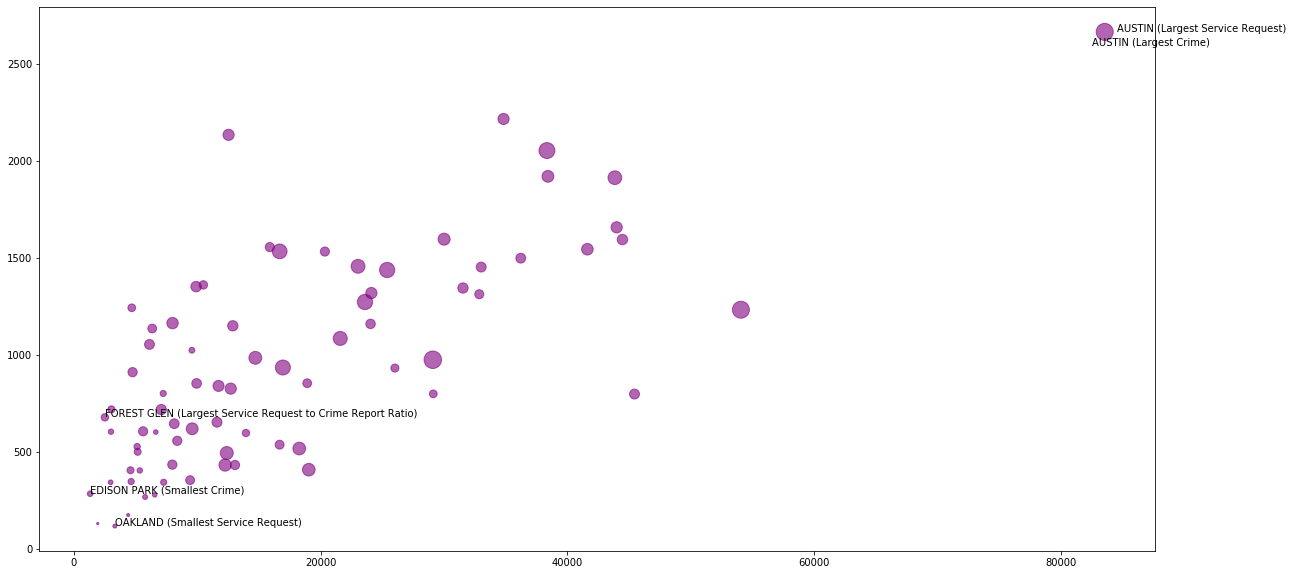

In [445]:
#Let's make some visuals
#community areas by crime by street

x=bycomm_pop['ID']
y=bycomm_pop['Service Request Number']
z=bycomm_pop['Community']
w=bycomm_pop['No. of Service Requests to Crime Reports']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x,y,s=bycomm_pop['Total Population']*.003,c='purple',alpha=0.6)
    
y_max=y.max()
y_min=y.min()

i=bycomm_pop.loc[y==y_max, 'ID'].iloc[0]
j=bycomm_pop.loc[y==y_max, 'Service Request Number'].iloc[0]
ax.annotate(bycomm_pop.loc[y==y_max, 'Community'].iloc[0] + " (Largest Service Request)", xy=(i+1000, j))

k=bycomm_pop.loc[y==y_min, 'ID'].iloc[0]
m=bycomm_pop.loc[y==y_min, 'Service Request Number'].iloc[0]
ax.annotate(bycomm_pop.loc[y==y_min, 'Community'].iloc[0] + " (Smallest Service Request)", xy=(k, m))

x_max=x.max()
x_min=x.min()

n=bycomm_pop.loc[x==x_max, 'ID'].iloc[0]
p=bycomm_pop.loc[x==x_max, 'Service Request Number'].iloc[0]
print(n)
print(p)
ax.annotate(bycomm_pop.loc[x==x_max, 'Community'].iloc[0] + " (Largest Crime)", xy=(n-1000, p-75))

q=bycomm_pop.loc[x==x_min, 'ID'].iloc[0]
r=bycomm_pop.loc[x==x_min, 'Service Request Number'].iloc[0]
print(q)
print(r)
ax.annotate(bycomm_pop.loc[x==x_min, 'Community'].iloc[0] + " (Smallest Crime)", xy=(q, r))

w_max=w.max()
w_min=w.min()

t=bycomm_pop.loc[w==w_max, 'ID'].iloc[0]
u=bycomm_pop.loc[w==w_max, 'Service Request Number'].iloc[0]
print(t)
print(u)
ax.annotate(bycomm_pop.loc[w==w_max, 'Community'].iloc[0] + " (Largest Service Request to Crime Report Ratio)", xy=(t, u))

w=bycomm_pop.loc[w==w_min, 'ID'].iloc[0]
f=bycomm_pop.loc[w==w_min, 'Service Request Number'].iloc[0]
print(w)
print(f)
ax.annotate(bycomm_pop.loc[w==w_min, 'Community'].iloc[0] + " (Smallest  Service Request to Crime Report Ratio)", xy=(w, f))